# `nb04`: Latent variable models

<img src="./figures/nb06/lvm.png" width="40%" />

Latent variable models (LVMs) are a class of models that are used to describe the relationship between a set of observed variables and a set of latent variables. They are used in many scientific fields to describe a data generating process and its observations. Many of the models we will discuss in this course are LVMs. In this notebook, we will showcase some of the most common LVMs.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Probabilistic PCA

In [2]:
from scipy.stats import norm

# Parameters
n_latents = 2
n_features = 10

B = np.random.rand(n_features, n_latents)   # Set to random values
mu = 0
sigma2 = 1

# Forward generative model
z = norm(0, 1).rvs(size=n_latents)
x = norm(np.dot(B, z) + mu, sigma2).rvs()

print("z =", z)
print("x =", x)

z = [ 0.68334799 -0.8821538 ]
x = [-5.11057219e-01  3.73804468e-01  8.49076461e-01 -2.03051043e+00
  5.06964411e-04 -1.00380996e+00 -2.77222407e-03  1.24211386e+00
  2.65247456e-01  6.16982630e-01]


# Mixture model

In [3]:
from scipy.stats import multivariate_normal, dirichlet, multinomial

# Parameters
K = 3
N = 200

alpha = np.ones(K) * 1.5
sigma2_0 = 10.0

# Forward generative model
theta = dirichlet(alpha).rvs().ravel()
mu = multivariate_normal(np.zeros(2), sigma2_0).rvs(K)

z = multinomial(1, theta).rvs(N)
z = np.argmax(z, axis=1)
x = np.zeros((N, 2))

for i in range(N):
    x[i] = multivariate_normal(mu[z[i]]).rvs()

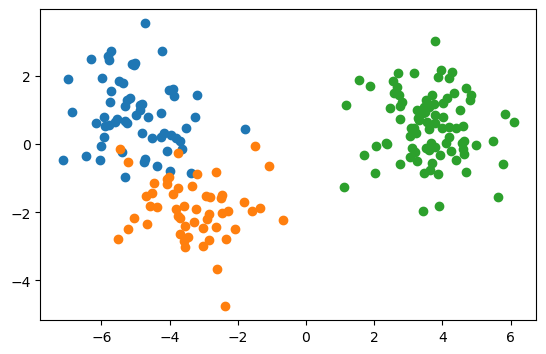

In [4]:
fig = plt.figure()
ax = plt.axes()

for k in range(K):
    ax.scatter(x[z == k, 0], x[z == k, 1])

ax.set(aspect="equal")
plt.show()

# Latent Dirichlet Allocation

<img src="./figures/nb06/lda.png" width="60%" /> 

(Reproduced from [Blei, 2011](https://www.eecis.udel.edu/~shatkay/Course/papers/UIntrotoTopicModelsBlei2011-5.pdf).)

- Each topic is a distribution over words
- Each document is a mixture of corpus-wide topics
- Each word is drawn from one of those topics

In [5]:
# Draw LDA as a graphical model
# ...

In [6]:
# Write a probabilistic generative model
# ...